In [23]:
import pandas as pd
import gensim
import time
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
import numpy as np

In [2]:
with open('Data/Lemmatized/France_lemmatized.txt') as file:
    lines = file.readlines()

## Tokenize

In [3]:
corpus = [list(gensim.utils.tokenize(line, deacc = True)) for line in lines]

In [4]:
corpus = pd.DataFrame({'reviews': corpus})

In [45]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(corpus, test_size=0.2)

In [47]:
docs_train, docs_test = train['reviews'], test['reviews']

In [48]:
# msk = np.random.rand(len(docs)) < 0.8

# docs_train = docs[msk]
# docs_test = docs[~msk]

# print(len(docs_train), len(docs_test))

In [49]:
dictionary = gensim.corpora.Dictionary(docs)

In [50]:
bow_train = [dictionary.doc2bow(doc) for doc in docs_train]
bow_test = [dictionary.doc2bow(doc) for doc in docs_test]

## TF-IDF

In [42]:
from gensim.models.coherencemodel import CoherenceModel

In [51]:
tfidf_train = gensim.models.TfidfModel(bow_train)
tfidf_test = gensim.models.TfidfModel(bow_test)

tfidf_train = tfidf_train[bow_train]
tfidf_test = tfidf_test[bow_test]

In [52]:
country = "France"
no_iterations = 50
file_name_umass = "Data/Result/" + country + "_"+str(no_iterations) +"_result_umass.csv"
file_name_uci = "Data/Result/" + country + "_"+str(no_iterations) +"_result_uci.csv"
file_name_perplexity = "Data/Result/" + country + "_"+str(no_iterations) +"_result_perplexity.csv"

file_write_umass = open(file_name_umass, "a")
file_write_uci = open(file_name_uci, "a")
file_write_perplexity = open(file_name_perplexity, "a")

for no_topics in range(40,101):

    start = time.time()
    lda_model_tfidf = gensim.models.LdaModel(tfidf_train, 
                                             num_topics=no_topics, 
                                             id2word = dictionary, 
                                             passes = 2,
                                            iterations= no_iterations)
    end = time.time()
    print("Number of topics: " + str(no_topics))
    print("Processing time: %fs" % (end - start))
    u_mass = CoherenceModel(model=lda_model_tfidf, corpus=bow_train, dictionary=dictionary ,coherence='u_mass', topn=20)
    #uci = CoherenceModel(model=lda_model_tfidf, texts=train, corpus=bow_train, dictionary=dictionary ,coherence='c_uci', topn=20)
    u_mass_res = u_mass.get_coherence() 
    uci_res = uci.get_coherence()
    perplexity = lda_model_tfidf.log_perplexity(tfidf_train, len(docs_train))
    
    file_write_umass.write(str(no_topics) + "," + str(u_mass_res) +","+str(end-start)+"\n")
    file_write_uci.write(str(no_topics) + "," + str(uci_res) +","+str(end-start)+"\n")
    file_write_perplexity.write(str(no_topics) + "," + str(perplexity) +","+str(end - start)+"\n")
    print("Topics coherence: Umass: " + str(u_mass_res) + " UCI: " +str(uci_res) + " Perplexity: " + str(perplexity))
    
file_write_uci.close()
file_write_umass.close()
file_write_perplexity.close()

Number of topics: 40
Processing time: 7.307981s


/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)


Topics coherence: Umass: -12.385185822588772 UCI: inf Perplexity: -16.28212881457311
Number of topics: 41
Processing time: 7.166585s
Topics coherence: Umass: -12.216915436266866 UCI: inf Perplexity: -16.48210901551239
Number of topics: 42
Processing time: 7.927779s
Topics coherence: Umass: -11.949294482986083 UCI: inf Perplexity: -16.638574445196518
Number of topics: 43
Processing time: 7.293940s
Topics coherence: Umass: -12.872205178539875 UCI: inf Perplexity: -16.82779722517513
Number of topics: 44
Processing time: 7.144527s
Topics coherence: Umass: -13.041186930489904 UCI: inf Perplexity: -17.050125587344223
Number of topics: 45
Processing time: 7.309887s
Topics coherence: Umass: -11.95761351479975 UCI: inf Perplexity: -17.38947377583861
Number of topics: 46
Processing time: 7.331200s
Topics coherence: Umass: -11.896848968526923 UCI: inf Perplexity: -17.579082112065226
Number of topics: 47
Processing time: 7.374340s
Topics coherence: Umass: -10.616081432952265 UCI: inf Perplexity: -

/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)


Topics coherence: Umass: -12.04237668875389 UCI: nan Perplexity: -18.10622752022975
Number of topics: 49
Processing time: 7.622137s
Topics coherence: Umass: -11.52593613965244 UCI: inf Perplexity: -18.378805734133206
Number of topics: 50
Processing time: 7.501706s
Topics coherence: Umass: -11.712269674335362 UCI: inf Perplexity: -18.614584271260007
Number of topics: 51
Processing time: 9.773135s
Topics coherence: Umass: -11.47883573339663 UCI: nan Perplexity: -18.838935171956887
Number of topics: 52
Processing time: 7.638670s
Topics coherence: Umass: -11.886718299078563 UCI: nan Perplexity: -19.092127624457007
Number of topics: 53
Processing time: 7.560161s
Topics coherence: Umass: -11.940745442830538 UCI: inf Perplexity: -19.408320810164795
Number of topics: 54
Processing time: 7.497113s
Topics coherence: Umass: -11.098857817840795 UCI: nan Perplexity: -19.82979919536218
Number of topics: 55
Processing time: 7.622898s
Topics coherence: Umass: -9.81344165139596 UCI: inf Perplexity: -20

In [53]:
# France train: 77

start = time.time()
lda_model_tfidf = gensim.models.LdaModel(tfidf_train, 
                                             num_topics=77, 
                                             id2word = dictionary, 
                                             passes = 2,
                                            iterations= 50)
end = time.time()
print("Number of topics: " + str(77))
print("Processing time: %fs" % (end - start))
cm = CoherenceModel(model=lda_model_tfidf, corpus=bow_train, dictionary=dictionary ,coherence='u_mass', topn=20)
coherence = cm.get_coherence() 

perplexity = lda_model_tfidf.log_perplexity(tfidf_train, len(docs_train))

print("Train topics coherence: " + str(coherence))
print("Perplexity: " + str(perplexity))
# Test
u_mass = CoherenceModel(model=lda_model_tfidf, corpus=bow_test, dictionary=dictionary ,coherence='u_mass', topn=20)
u_mass_res_test = u_mass.get_coherence()

perplexity_test = lda_model_tfidf.log_perplexity(tfidf_test, len(docs_test))
print("Topics coherence: " + str(coherence))
print("Perplexity: " + str(perplexity))

Number of topics: 77
Processing time: 8.487344s
Topics coherence: -5.92627370770722


In [14]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))
    print("\n")

Topic: 0 Word: 0.047*"information" + 0.026*"perfume" + 0.026*"available" + 0.024*"plenty" + 0.024*"nearby" + 0.023*"parking" + 0.020*"wide" + 0.019*"various" + 0.018*"know" + 0.017*"selection"


Topic: 1 Word: 0.091*"delicious" + 0.073*"try" + 0.040*"resort" + 0.038*"complete" + 0.028*"l" + 0.018*"monday" + 0.014*"ste" + 0.010*"palais" + 0.010*"ops" + 0.005*"without"


Topic: 2 Word: 0.200*"fantastic" + 0.035*"unlike" + 0.032*"artist" + 0.020*"travelled" + 0.017*"painting" + 0.015*"van" + 0.013*"monet" + 0.013*"justice" + 0.009*"majority" + 0.008*"known"


Topic: 3 Word: 0.052*"favourite" + 0.046*"traditional" + 0.032*"theatre" + 0.017*"term" + 0.000*"explore" + 0.000*"place" + 0.000*"eat" + 0.000*"close" + 0.000*"st" + 0.000*"charming"


Topic: 4 Word: 0.038*"bay" + 0.026*"dedicated" + 0.025*"member" + 0.023*"helped" + 0.023*"nearly" + 0.021*"onsite" + 0.021*"behold" + 0.018*"following" + 0.015*"tough" + 0.014*"trek"


Topic: 5 Word: 0.000*"plently" + 0.000*"revolutionise" + 0.000*"or

In [89]:
pyLDAvis.gensim_models.prepare(lda_model_tfidf, tfidf, dictionary)

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
41    -0.468661+0.000000j  0.026711+0.000000j       1        1  24.313815
70    -0.338509+0.000000j -0.024980+0.000000j       2        1   5.296000
17    -0.340769+0.000000j -0.087413+0.000000j       3        1   4.714918
29    -0.360098+0.000000j -0.079860+0.000000j       4        1   4.672406
39    -0.301191+0.000000j  0.223410+0.000000j       5        1   3.698648
...                   ...                 ...     ...      ...        ...
15     0.097589+0.000000j -0.000501+0.000000j      69        1   0.329806
13     0.097589+0.000000j -0.000501+0.000000j      70        1   0.329806
8      0.097589+0.000000j -0.000501+0.000000j      71        1   0.329806
5      0.097589+0.000000j -0.000501+0.000000j      72        1   0.329806
36     0.097589+0.000000j -0.000501+0.000000j      73        1   0.329806

[73 ro

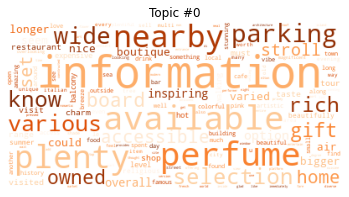

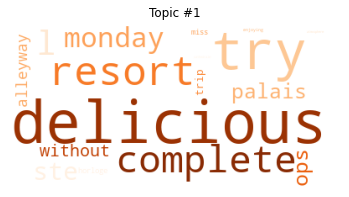

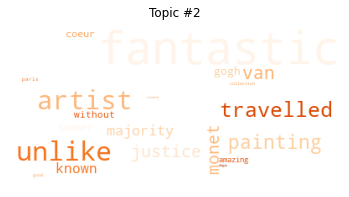

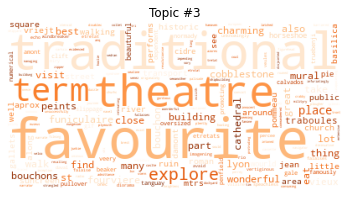

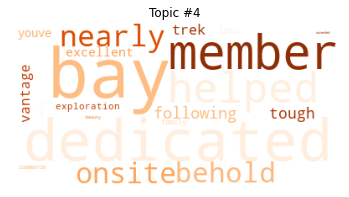

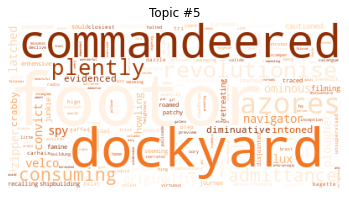

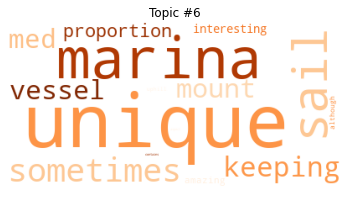

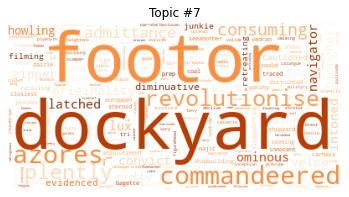

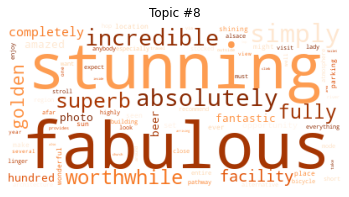

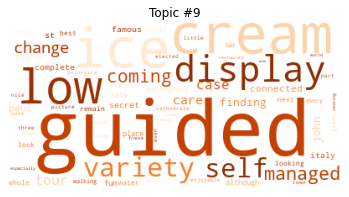

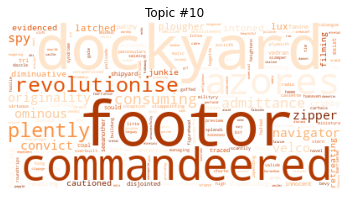

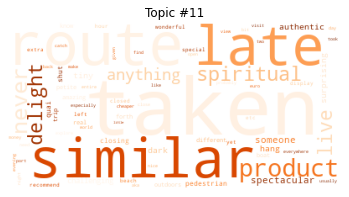

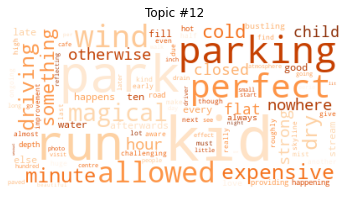

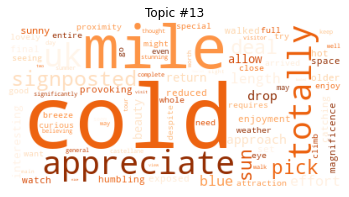

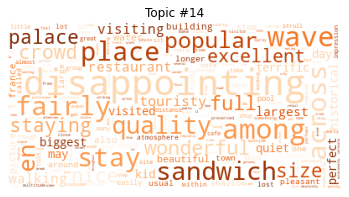

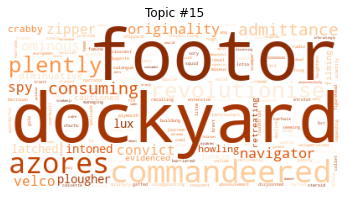

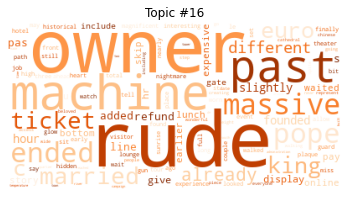

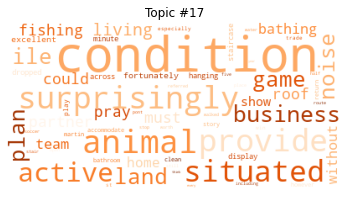

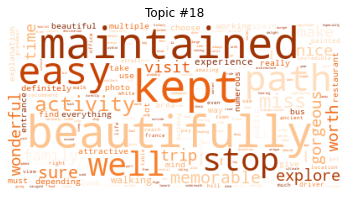

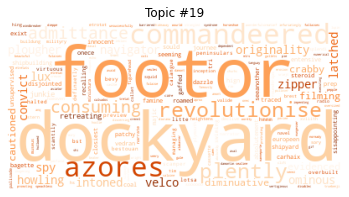

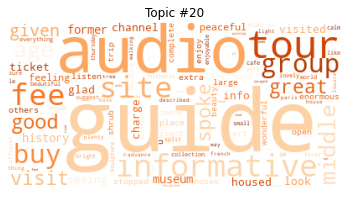

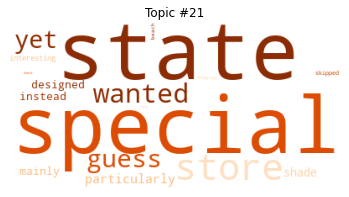

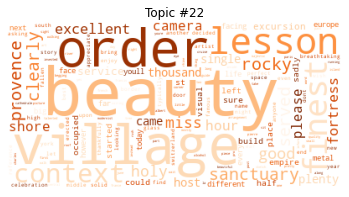

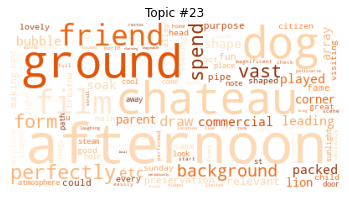

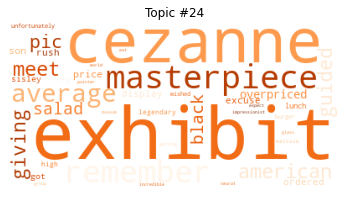

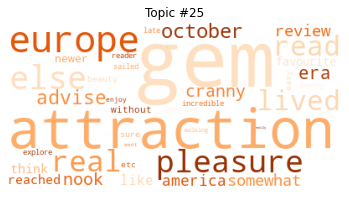

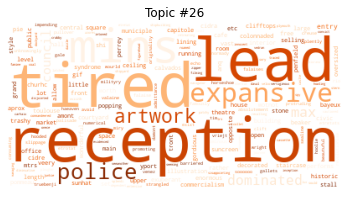

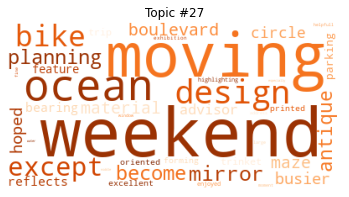

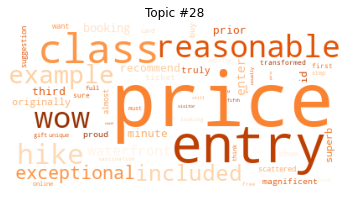

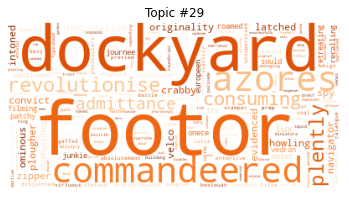

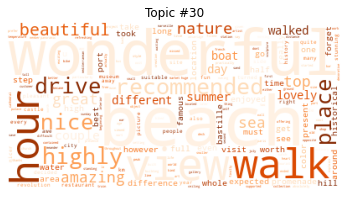

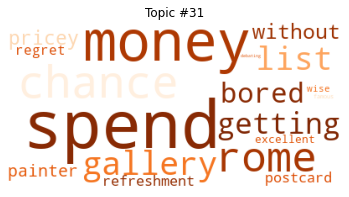

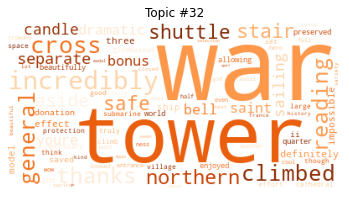

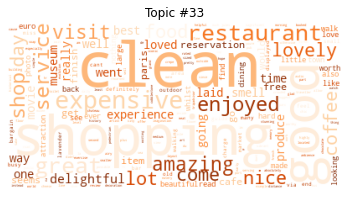

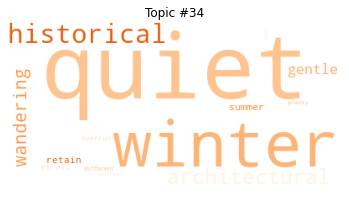

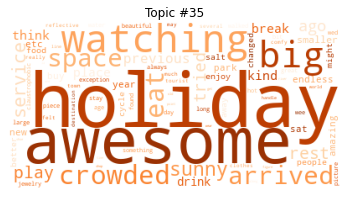

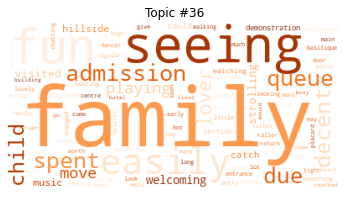

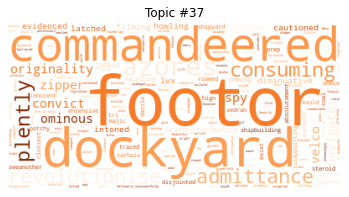

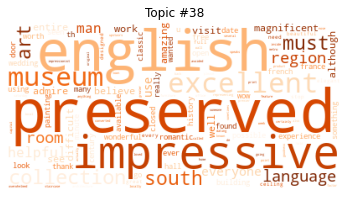

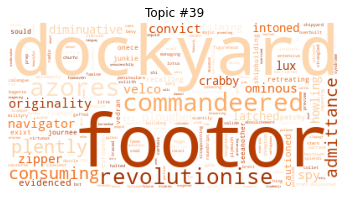

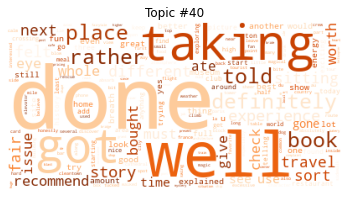

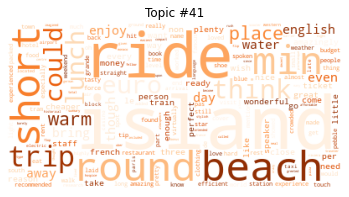

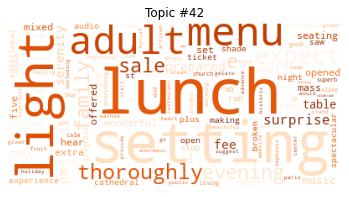

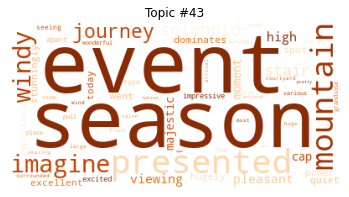

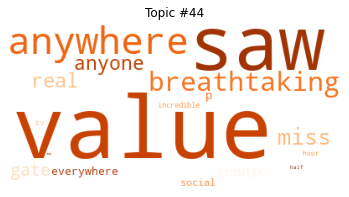

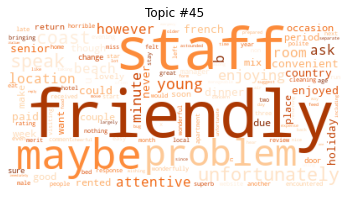

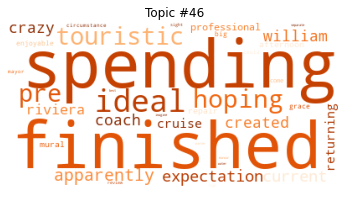

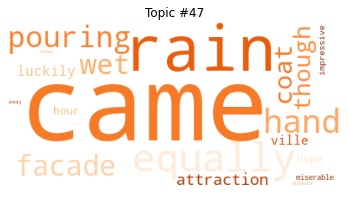

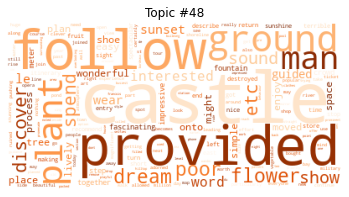

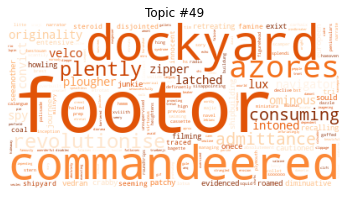

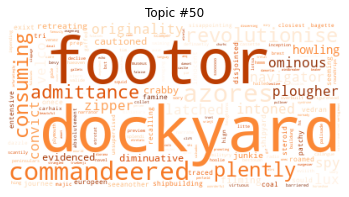

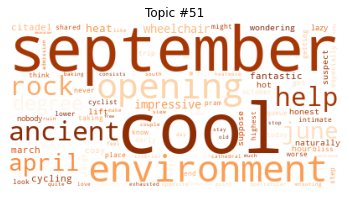

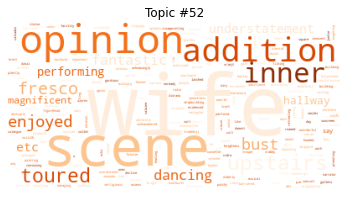

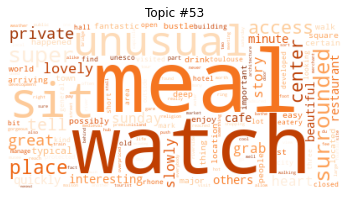

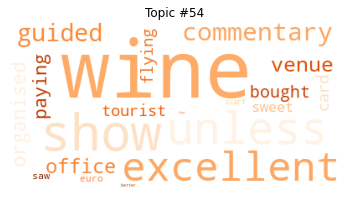

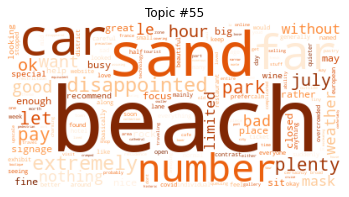

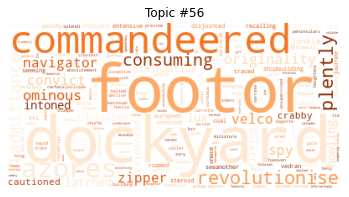

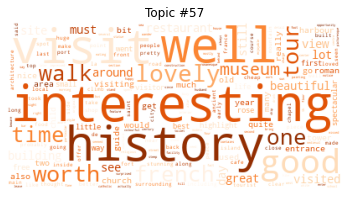

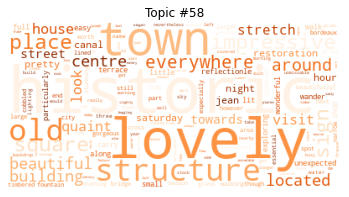

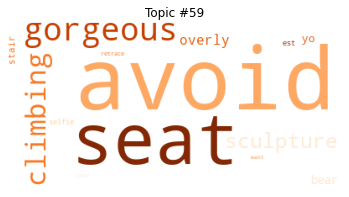

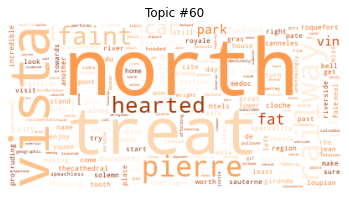

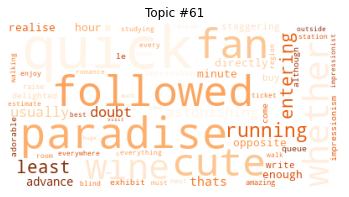

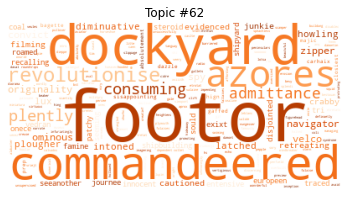

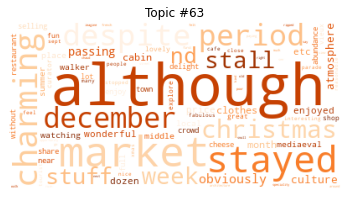

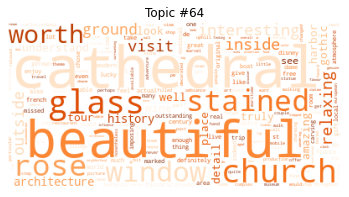

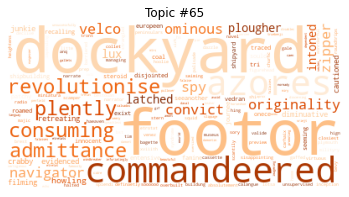

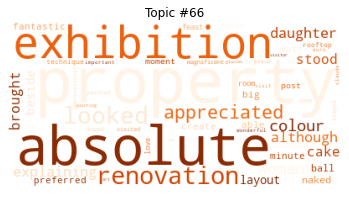

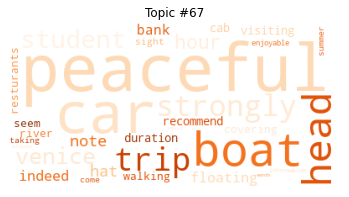

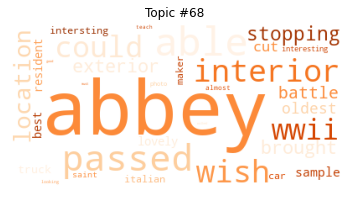

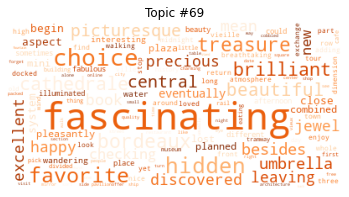

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for t in range(lda_model_tfidf.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white', colormap='Oranges').fit_words(dict(lda_model_tfidf.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [16]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel

In [17]:
cm = CoherenceModel(model=lda_model_tfidf, texts=corpus,coherence='c_v', window_size=100)
coherence = cm.get_coherence()  # get coherence value

/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/gensim/topic_coherence/direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/Users/thuytdv/miniforge3/envs/PycharmProjects/lib/python3.9/site-packages/gensim/topic_coherence/indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [18]:
coherence

nan

In [19]:
from gensim.test.utils import datapath

lda_model_tfidf.save("Data/Models/France/France2")

In [129]:
lda_model_tfidf.log_perplexity(bow, len(docs))

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-21.784487887687312

/Users/thanhson/PycharmProjects/Venv/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
